# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

C:\Users\Ashok\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\Ashok\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


                          reproduce coverage  reproduce density
Total biomass                          100.0              100.0
Demand elasticity                      100.0              100.0
Biomass backstop price                 100.0              100.0
Cellulosic cost                         80.0               70.0
Electricity coproduction                10.0               10.0
Cellulosic yield                         0.0               10.0
Feedstock distribution                   0.0                0.0
Oil elasticity                           0.0                0.0
oil supply shift                         0.0                0.0
coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.79998

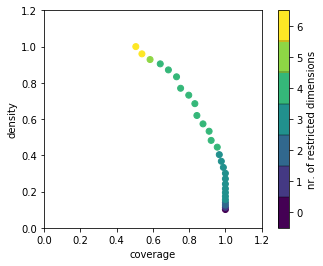

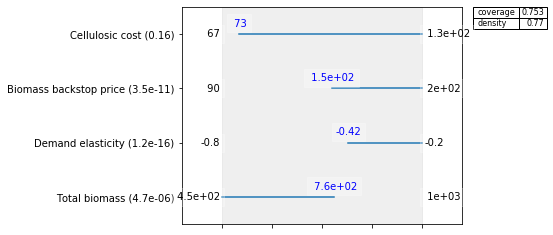

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

data = pd.read_csv("C:/Users/Ashok/Documents/EPA/EPA Q4/Model-Based Decision Making/Assignment Collaboration/Week 3-4 - vulnerability analysis/data/Bryant et al 2010.csv", index_col=False)
x = data.iloc[:, 2:11]
y = data.iloc[:, 15].values

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(21))
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()

In [3]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.100907,0,1.000000,0.100907,0
1,1.000000,0.112374,1,0.897959,0.112374,1
2,1.000000,0.125352,2,0.804989,0.125352,2
3,1.000000,0.139498,3,0.723356,0.139498,2
4,1.000000,0.155323,4,0.649660,0.155323,3
5,1.000000,0.173489,5,0.581633,0.173489,3
6,1.000000,0.194323,6,0.519274,0.194323,3
7,1.000000,0.216019,7,0.467120,0.216019,3
8,1.000000,0.241848,8,0.417234,0.241848,3
9,1.000000,0.270517,9,0.373016,0.270517,3


In [5]:
data.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [6]:
x

,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000
5,90.000000,689.799988,0.22,94.400002,0.256,-0.790,1.82,0.066,174.899994
6,85.199997,500.600006,0.07,90.599998,0.293,-0.711,0.59,-0.018,114.199997
7,106.099999,639.200012,0.28,90.800003,0.232,-0.378,1.86,-0.052,111.599999
8,89.500000,802.000000,0.21,94.400002,0.402,-0.555,1.77,-0.015,141.500000
9,85.199997,874.599976,0.74,89.500000,0.579,-0.738,0.57,-0.034,185.000000


# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [14]:
data_2=pd.read_csv("C:/Users/Ashok/Documents/EPA/EPA Q4/Model-Based Decision Making/Assignment Collaboration/Week 3-4 - vulnerability analysis/data/Rozenberg et al 2014.csv", index_col=False)
experiments = data_2.iloc[:, :6]
SSP1=data_2.iloc[:, 7].values
SSP2=data_2.iloc[:, 8].values
SSP3=data_2.iloc[:, 9].values
SSP4=data_2.iloc[:, 10].values
SSP5=data_2.iloc[:, 11].values
data_2.head()


,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


              reproduce coverage  reproduce density
behaviors                   70.0              100.0
population                  50.0               40.0
convergence                 20.0               20.0
inequalities                 0.0               20.0
technologies                 0.0                0.0
fossils                      0.0                0.0
coverage    0.931818
density      0.43617
id                 2
mass        0.328671
mean         0.43617
res_dim            2
Name: 2, dtype: object

           box 2                                     
             min  max                       qp values
population   0.0  1.0   [-1.0, 0.0053050108805884795]
behaviors    1.0  1.0  [1.0335608773546834e-06, -1.0]



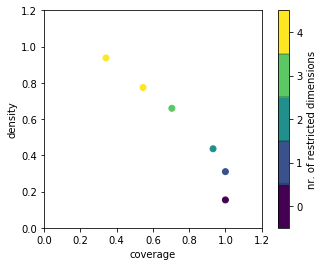

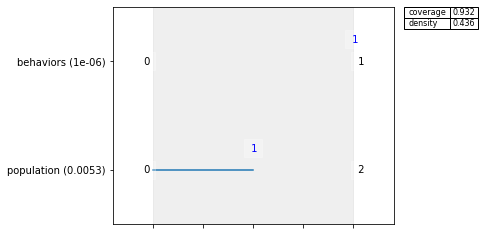

In [24]:
prim_SSP1 = prim.Prim(experiments, SSP1, threshold=0.5, peel_alpha=0.1)
box_SSP1 = prim_SSP1.find_box()

box_SSP1.show_tradeoff()
print(box_SSP1.resample(2))# change this number
box_SSP1.inspect(2)
box_SSP1.inspect(2, style='graph')

plt.show()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


              reproduce coverage  reproduce density
behaviors                   70.0              100.0
population                  50.0               40.0
convergence                 20.0               20.0
inequalities                 0.0               20.0
technologies                 0.0                0.0
fossils                      0.0                0.0
coverage    0.571429
density     0.168421
id                 2
mass        0.332168
mean        0.168421
res_dim            2
Name: 2, dtype: object

             box 2                                  
               min  max                    qp values
convergence    0.0  1.0  [-1.0, 0.06236019447023799]
inequalities   1.0  1.0  [0.14063844785656618, -1.0]



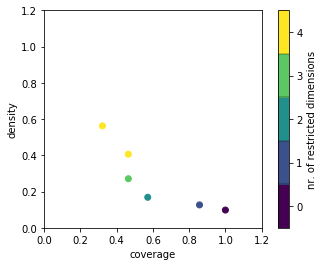

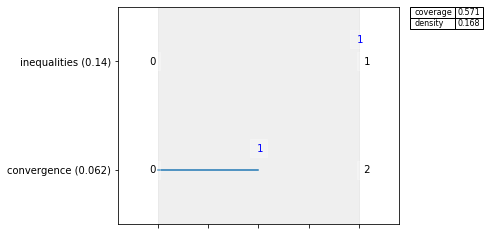

In [25]:
prim_SSP2 = prim.Prim(experiments, SSP2, threshold=0.5, peel_alpha=0.1)
box_SSP2 = prim_SSP2.find_box()

box_SSP2.show_tradeoff()
print(box_SSP1.resample(2))# change this number
box_SSP2.inspect(2)
box_SSP2.inspect(2, style='graph')

plt.show()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


              reproduce coverage  reproduce density
behaviors                   10.0              100.0
inequalities                10.0               40.0
population                   0.0               30.0
technologies                 0.0               10.0
convergence                  0.0                0.0
fossils                      0.0                0.0
coverage       0.975
density      0.40625
id                 2
mass        0.335664
mean         0.40625
res_dim            2
Name: 2, dtype: object

           box 2                                    
             min  max                      qp values
behaviors    0.0  0.0  [-1.0, 5.830014202565754e-06]
population   1.0  2.0   [0.004481112142620738, -1.0]



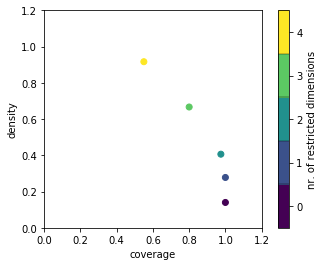

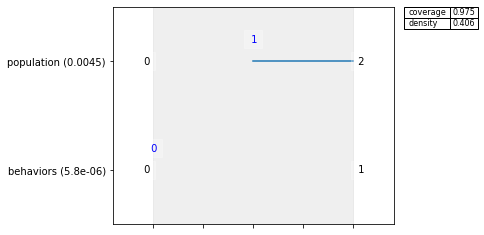

In [26]:
prim_SSP3 = prim.Prim(experiments, SSP3, threshold=0.5, peel_alpha=0.1)
box_SSP3 = prim_SSP3.find_box()

box_SSP3.show_tradeoff()
print(box_SSP3.resample(2))# change this number
box_SSP3.inspect(2)
box_SSP3.inspect(2, style='graph')

plt.show()


[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


              reproduce coverage  reproduce density
behaviors                   50.0              100.0
population                  50.0               30.0
inequalities                 0.0               10.0
convergence                  0.0                0.0
technologies                 0.0                0.0
fossils                      0.0                0.0
coverage    0.931818
density      0.43617
id                 2
mass        0.328671
mean         0.43617
res_dim            2
Name: 2, dtype: object

           box 2                                     
             min  max                       qp values
population   0.0  1.0   [-1.0, 0.0053050108805884795]
behaviors    1.0  1.0  [1.0335608773546834e-06, -1.0]



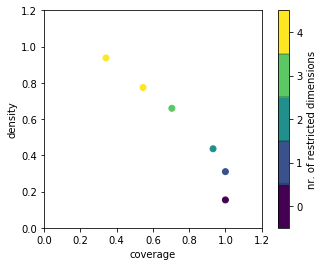

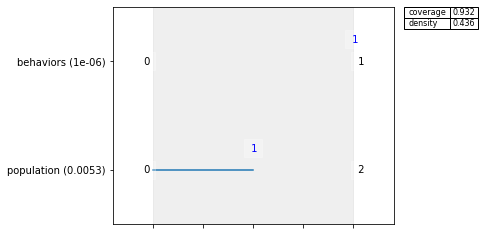

In [27]:
prim_SSP4 = prim.Prim(experiments, SSP1, threshold=0.5, peel_alpha=0.1)
box_SSP4 = prim_SSP4.find_box()

box_SSP4.show_tradeoff()
print(box_SSP4.resample(2))# change this number
box_SSP4.inspect(2)
box_SSP4.inspect(2, style='graph')

plt.show()

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.47368421052631576, density: 0.5625 restricted_dimensions: 4


              reproduce coverage  reproduce density
behaviors                   70.0              100.0
population                  50.0               40.0
convergence                 20.0               20.0
inequalities                 0.0               20.0
technologies                 0.0                0.0
fossils                      0.0                0.0
coverage    0.894737
density     0.177083
id                 2
mass        0.335664
mean        0.177083
res_dim            1
Name: 2, dtype: object

            box 2                                    
              min  max                      qp values
convergence   2.0  2.0  [0.0001875793837669401, -1.0]



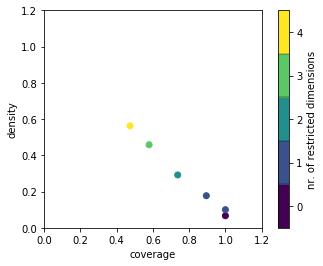

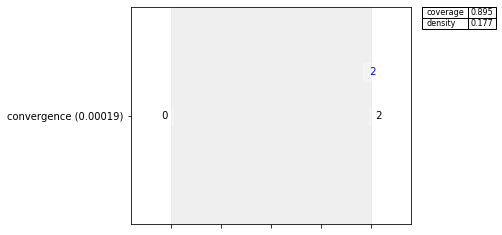

In [29]:
prim_SSP5 = prim.Prim(experiments, SSP5, threshold=0.5, peel_alpha=0.1)
box_SSP5 = prim_SSP5.find_box()

box_SSP5.show_tradeoff()
print(box_SSP1.resample(2))# change this number
box_SSP5.inspect(2)
box_SSP5.inspect(2, style='graph')

plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?
